[*********************100%***********************]  12 of 12 completed


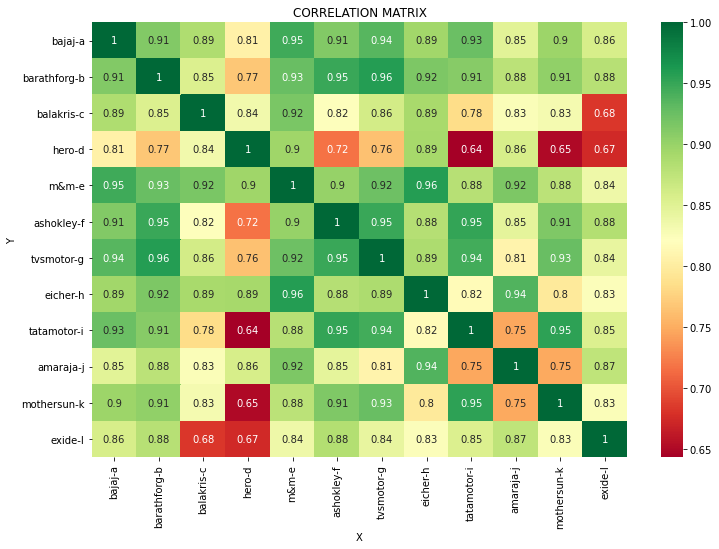

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import numpy as np
import yfinance as yf
import seaborn as sn
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression

stocks =yf.download(["BAJAJ-AUTO.NS","BHARATFORG.NS","TATAMOTORS.NS","BALKRISIND.NS","HEROMOTOCO.NS","M&M.NS","ASHOKLEY.NS","TVSMOTOR.NS","EICHERMOT.NS","AMARAJABAT.NS","MOTHERSUMI.NS","EXIDEIND.NS"], 
                    start = '2020-01-01', end = '2021-05-25')
a = stocks['Adj Close']["BAJAJ-AUTO.NS"]
b = stocks['Adj Close']["BHARATFORG.NS"]
c = stocks['Adj Close']["BALKRISIND.NS"]
d = stocks['Adj Close']["HEROMOTOCO.NS"]
e = stocks['Adj Close']["M&M.NS"]
f = stocks['Adj Close']["ASHOKLEY.NS"]
g = stocks['Adj Close']["TVSMOTOR.NS"]
h = stocks['Adj Close']["EICHERMOT.NS"]
i = stocks['Adj Close']["TATAMOTORS.NS"]
j = stocks['Adj Close']["AMARAJABAT.NS"]
k = stocks['Adj Close']["MOTHERSUMI.NS"]
l = stocks['Adj Close']["EXIDEIND.NS"]

data = {'bajaj-a': a,'barathforg-b':b,'balakris-c':c,'hero-d':d,'m&m-e':e,'ashokley-f':f,'tvsmotor-g':g,'eicher-h':h,'tatamotor-i':i,'amaraja-j':j,'mothersun-k':k,'exide-l':l}

df = pd.DataFrame(data,columns=['bajaj-a','barathforg-b','balakris-c','hero-d','m&m-e','ashokley-f','tvsmotor-g','eicher-h','tatamotor-i','amaraja-j','mothersun-k','exide-l'])  
corrMatrix = df.corr()
plt.figure(figsize=(12,8 ))
plt.title('CORRELATION MATRIX')
sn.heatmap(corrMatrix, annot=True,cmap='RdYlGn')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

p-value:0.001073


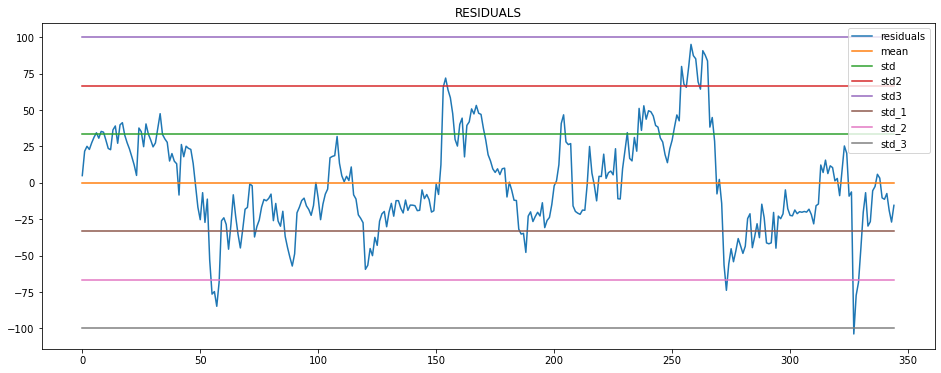

In [47]:
import scipy.stats as stats

x =np.array(g).reshape((-1,1))
y= np.array(b)
             
model = LinearRegression().fit(x,y)
y_pred = model.predict(x)
res = y-y_pred

p_value = adfuller(res)
print('p-value:%f'%p_value[1]) 
 
mean = res.mean()
std1 = mean + res.std()
std2 = mean + 2*res.std()
std3 = mean + 3*res.std()
std_1 = mean - res.std()
std_2 = mean - 2*res.std()
std_3 = mean - 3*res.std()
df = pd.DataFrame({'residuals':res,'mean':mean,'std':std1,'std2':std2,'std3':std3,'std_1':std_1,'std_2':std_2,'std_3':std_3})
plt.rcParams['figure.figsize']=(16,6)
df.plot()
plt.title('RESIDUALS')
plt.show()